In [1]:
import glob
import numpy as np
from astropy.io import fits
import pandas as pd
from astropy.stats import LombScargle

In [2]:
import sys
terminalpythonpath=['', '/home/szabopal/PycharmProjects/venv36/lib/python36.zip', '/home/szabopal/PycharmProjects/venv36/lib/python3.6', '/home/szabopal/PycharmProjects/venv36/lib/python3.6/lib-dynload', '/usr/lib/python3.6', '/home/szabopal/PycharmProjects/venv36/lib/python3.6/site-packages']
[sys.path.append(each) for each in terminalpythonpath]
import matplotlib.pyplot as plt

In [3]:
import matplotlib.gridspec as gridspec

In [4]:
def massAAPreader(ID, campaign):
    
    try:

        #lcfile=glob.glob('../../GO*/*'+target.split('/')[-1].split('_')[0][4:]+'*k2sc.lc');
        lcfile=glob.glob('../../GO*/ktwo'+str(ID)+'-c'+campaign+'_lpd-targ.fits_massAAP_lc_TH8_k2sc.lc')[0]

       # if len(lcfile)==0:
       #     massAAP_k2sc_corr_flux = massAAP(each,True)
       #     lcfile=glob.glob('../../GO*/*'+target.split('/')[-1].split('_')[0][4:]+'*k2sc.lc')

        #print(lcfile)
        lc=np.genfromtxt(lcfile,delimiter=' ',skip_header=1)
        massAAPreader.lc=lc
        bjd=lc[:,0]
        flux=lc[:,1]

        
        return bjd, flux
    
    except IndexError:
        
        return False, False

In [5]:
def k2sffreader(ID, campaign):
    
    try:

        k2sfffile = 'K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_'+str(ID)+'-c'+campaign+'_kepler_v1_llc.fits'
        print(k2sfffile)
        
      #  if 'c102' in target:
      #      k2sfffile ='hlsp_k2sff_k2_lightcurve_'+target.split('/')[-1][4:19]+'kepler_v1_llc.fits'
      #  else:
      #      k2sfffile ='hlsp_k2sff_k2_lightcurve_'+target.split('/')[-1][4:18]+'kepler_v1_llc.fits'

  #      hdul = fits.open('K2SFF_LCs_from_MAST_via_file_upload_form/'+k2sfffile)
         
  #      data=hdul[1].data
    
        data = fits.getdata(k2sfffile, ext=1)
        
#        k2sff_time=hdul[1].data['T']
#        k2sff_fcor=hdul[1].data['FCOR']
#        k2sff_fraw=hdul[1].data['FRAW']

        k2sff_time=data['T']
        k2sff_fcor=data['FCOR']
        k2sff_fraw=data['FRAW']

        
        del data
       # hdul.close()
    


        return k2sff_time, k2sff_fcor, k2sff_fraw
    
    except FileNotFoundError:
        
        return False, False, False

In [6]:
def K2SCzett_SAPandPDCMAPreader(ID, campaign):
    
    try:

        k2scfile = 'hlsp_k2sc_k2_llc_'+str(ID)+'-c'+campaign+'_kepler_v2_lc.fits'

      #  if 'c102' in target:
      #      k2scfile='hlsp_k2sc_k2_llc_'+target.split('/')[-1][4:19]+'kepler_v2_lc.fits'
      #  else:
      #      k2scfile='hlsp_k2sc_k2_llc_'+target.split('/')[-1][4:18]+'kepler_v2_lc.fits'

        #hdul=fits.open(k2scfile)

        
        
        #data=hdul[1].data
        
        data_ext1 = fits.getdata(k2scfile, ext=1)
        data_ext2 = fits.getdata(k2scfile, ext=2)
        
        k2sc_saptime=data_ext1['TIME'][[data_ext1['quality']][0]==0]    
        k2sc_sapflux=(data_ext1['flux']+data_ext1['trtime']-np.nanmedian(data_ext1['trtime']))[data_ext1['quality'] == 0]

        k2sc_pdcsaptime=data_ext2['TIME'][data_ext2['quality']==0]
        k2sc_pdcsapflux=(data_ext2['flux']+data_ext2['trtime']-np.nanmedian(data_ext2['trtime']))[data_ext2['quality'] == 0]

        #hdul.close()
        

        k2sc_saptime = k2sc_saptime[~np.isnan(k2sc_sapflux)]
        k2sc_sapflux = k2sc_sapflux[~np.isnan(k2sc_sapflux)]
        
        k2sc_pdcsaptime = k2sc_pdcsaptime[~np.isnan(k2sc_pdcsapflux)]
        k2sc_pdcsapflux = k2sc_pdcsapflux[~np.isnan(k2sc_pdcsapflux)]

        
        return k2sc_saptime, k2sc_sapflux, k2sc_pdcsaptime, k2sc_pdcsapflux
    
    except FileNotFoundError:
        
        return False, False, False, False

In [7]:
def SAPandPDCMAPreader(ID, campaign):
    
    try:
    
        sap_pdcmap_file='SAPandPDCMAPfromMAST/ktwo'+str(ID)+'-c'+campaign+'_llc.fits'

      #  if 'c102' in target:
      #      sap_pdcmap_file='SAPandPDCMAPfromMAST/ktwo'+target.split('/')[-1][4:19]+'llc.fits'
      #  else:
      #      sap_pdcmap_file='SAPandPDCMAPfromMAST/ktwo'+target.split('/')[-1][4:18]+'llc.fits'

   #     hdul=fits.open(sap_pdcmap_file)
   #     data=hdul[1].data

        data=fits.getdata(sap_pdcmap_file, ext=1)
        
        sapflux=data['SAP_FLUX'][data['SAP_QUALITY']==0]
        saptime=data['TIME'][data['SAP_QUALITY']==0]

        pdcsapflux=data['PDCSAP_FLUX'][data['SAP_QUALITY']==0]
        pdcsaptime=data['TIME'][data['SAP_QUALITY']==0]

        del data
        
        pdcsaptime = pdcsaptime[~np.isnan(pdcsapflux)]
        pdcsapflux = pdcsapflux[~np.isnan(pdcsapflux)]

        saptime = saptime[~np.isnan(sapflux)]
        sapflux = sapflux[~np.isnan(sapflux)]

        
        
    #    hdul.close()
        return sapflux, saptime, pdcsapflux, pdcsaptime
    
    except FileNotFoundError:
        return False, False, False, False

In [8]:
def K2P2reader(ID, campaign):
    
    try:

        #K2P2file=glob.glob('K2P2_attila_scriptjevel/'+target.split('/')[-1].split('_')[0]+'*')[0]

        K2P2file='K2P2_attila_scriptjevel/ktwo'+str(ID)+'-c'+campaign+'_llc.dat'

        df=pd.read_csv(K2P2file,skiprows=14,header=None,sep=r"\s*",engine='python')
        k2p2bjd=df[0][df[5]==0]
        k2p2flux=df[3][df[5]==0]

        del df
        
        return k2p2bjd, k2p2flux
    
    except FileNotFoundError:
        
        return False, False

In [9]:
def everestreader(ID, campaign):
    
    try:

        everestfile='/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_'+str(ID)+'-c'+campaign+'_kepler_v2.0_lc.fits'

        print(everestfile)
        print('\n')
        
      #  if 'c102' in target:
      #      everestfile='hlsp_everest_k2_llc_'+target.split('/')[-1][4:19]+'kepler_v2.0_lc.fits'
      #  else:
      #      everestfile='hlsp_everest_k2_llc_'+target.split('/')[-1][4:18]+'kepler_v2.0_lc.fits'


        #hdul = fits.open('EVEREST_LCs_from_MAST_via_file_upload_form/'+everestfile)
        
        data=fits.getdata(everestfile, ext=1)

        time=data['TIME']
        fcor=data['FCOR']
        everest_fraw = data['FRAW']
        quality=np.where(data['QUALITY']==0)    
        
        
        
        #time=hdul[1].data['TIME']
        #fcor=hdul[1].data['FCOR']
        #everest_fraw = hdul[1].data['FRAW']
        #quality=np.where(hdul[1].data['QUALITY']==0)    
        #hdul.close()

        everest_time=time[quality]
        everest_fcor=fcor[quality]

        everest_fraw_time=time

        del data
        
        

        return everest_time, everest_fcor, everest_fraw_time, everest_fraw
    
    except FileNotFoundError:
        
        return False, False, False, False

In [10]:
df=pd.read_csv('kp_mag_search.csv')
df0=pd.read_csv('k2_search.txt',sep=',')


class star:
    def __init__(self, ID, campaign):
        
        self.ID=ID
        self.campaign=campaign
        
        #self.keplermag = float((df[df['EPIC']==str(self.ID)]['KepMag']).values[0])
        
        self.massaapbjd, self.massaapflux = massAAPreader(self.ID, self.campaign)
        
        self.k2sff_time, self.k2sff_fcor, self.k2sff_fraw = k2sffreader(self.ID, self.campaign)
        self.k2sc_saptime, self.k2sc_sapflux, self.k2sc_pdcsaptime, self.k2sc_pdcsapflux = K2SCzett_SAPandPDCMAPreader(self.ID, self.campaign)
        self.sapflux, self.saptime, self.pdcsapflux, self.pdcsaptime = SAPandPDCMAPreader(self.ID, self.campaign)
        self.k2p2bjd, self.k2p2flux = K2P2reader(ID, campaign)
        self.everest_time, self.everest_fcor, self.everest_fraw_time, self.everest_fraw = everestreader(self.ID, self.campaign)
        

In [11]:
GO6082targets=glob.glob('../../GO6082/*c06*lpd*targ.fits')
GO8037targets=glob.glob('../../GO8037/*c08*lpd*targ.fits')
GO10037_1_targets=glob.glob('../../GO10037/*c101*lpd*targ.fits')
GO10037_2_targets=glob.glob('../../GO10037/*c102*lpd*targ.fits')
GO12111targets=glob.glob('../../GO12111/*c12*lpd*targ.fits')
GO13111targets=glob.glob('../../GO13111/*c13*lpd*targ.fits')
GO14058targets=glob.glob('../../GO14058/*c14*lpd*targ.fits')
GO15058targets=glob.glob('../../GO15058/*c15*lpd*targ.fits')
GO16058targets=glob.glob('../../GO16058/*c16*lpd*targ.fits')
GO17033targets=glob.glob('../../GO17033/*c17*lpd*targ.fits')
GO18033targets=glob.glob('../../GO18033/*c18*lpd*targ.fits')

In [12]:
targetlist=(
GO6082targets+
GO8037targets+
#GO10037_1_targets+
GO10037_2_targets+
GO12111targets+
GO13111targets+
GO14058targets+
GO15058targets+
GO16058targets+
GO17033targets+
GO18033targets)

In [13]:
def whitening(time, signaltowhiten):

    dowewantplots=False
    
    #write out every 32th roughly:
    if (np.random.rand() > 0.5 and 
        np.random.rand() > 0.5 and
        np.random.rand() > 0.5 and
        np.random.rand() > 0.5 and 
        np.random.rand() > 0.5):
        
        dowewantplots = True
    
    #print(time)
    #print(signaltowhiten)
    
    ls = LombScargle(time, signaltowhiten, nterms=1)

    nyquist = len(time)/(2*(max(time)-min(time)))

    freq, power = ls.autopower(normalization='psd',nyquist_factor=1, samples_per_peak=10)
    
    if dowewantplots:
        plt.plot(freq, power);
        plt.show()
    
    best_freq = freq[power.argmax()]
    best_power = power[power.argmax()]
    signalfit = ls.model(time, best_freq)

    if dowewantplots: 
        
        plt.figure(figsize=(15,5))
        plt.plot(time, signalfit)
        plt.plot(time, signaltowhiten,alpha=0.5)
        plt.plot(time, signaltowhiten-signalfit)
        #plt.xlim([2440,2450])
        plt.show()
    
    powerstd = np.std(power)
    
    return freq, power, signalfit, best_freq, best_power, powerstd

In [14]:
def evaluate_whats_left(time, signal_to_evaluate):
    
    #time=ourstar.k2sc_pdcsaptime
    #signal_to_evaluate=last_one_to_whiten_without_break_in_while_loop
    
    ls = LombScargle(time, signal_to_evaluate, nterms=1)

    nyquist = len(time)/(2*(max(time)-min(time)))

    freq, power = ls.autopower(normalization='psd',nyquist_factor=1, samples_per_peak=10)

    #plt.plot(1/freq, power)

    return np.median(power[(1/freq > 1) & (1/freq < 4)])

In [15]:
k2p2_noise_floor_dict={}

k2p2_noise_floor_dict_2={}

fout=open('evaluation_k2p2','w')
fout.write('targetname iter_num noise_floor\n')
fout.close()

0.0
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212330039-c06_kepler_v1_llc.fits


/home/szabopal/.local/lib/python3.6/site-packages/pandas/io/parsers.py:2379: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/szabopal/.local/lib/python3.6/site-packages/pandas/io/parsers.py:2381: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212330039-c06_kepler_v2.0_lc.fits




/home/szabopal/.local/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:80: RuntimeWarning: invalid value encountered in subtract
  y = y - np.dot(w, y)
/home/szabopal/.local/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/utils.py:140: RuntimeWarning: invalid value encountered in multiply
  h = h * np.exp(2j * np.pi * f0 * (t - t0))
/home/szabopal/.local/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/utils.py:71: RuntimeWarning: invalid value encountered in multiply
  numerator = y * np.prod(x - ilo - np.arange(M)[:, np.newaxis], 0)
/home/szabopal/.local/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/mle.py:98: RuntimeWarning: invalid value encountered in subtract
  y = (y - y_mean)
/home/szabopal/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


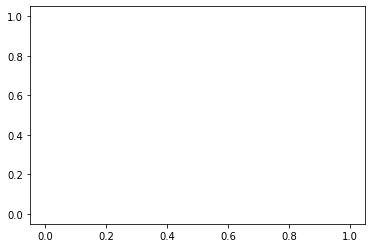

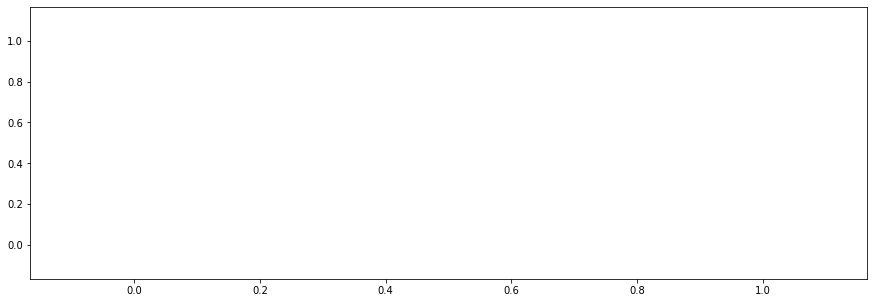

20


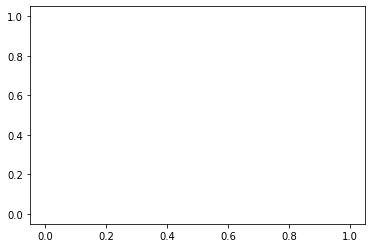

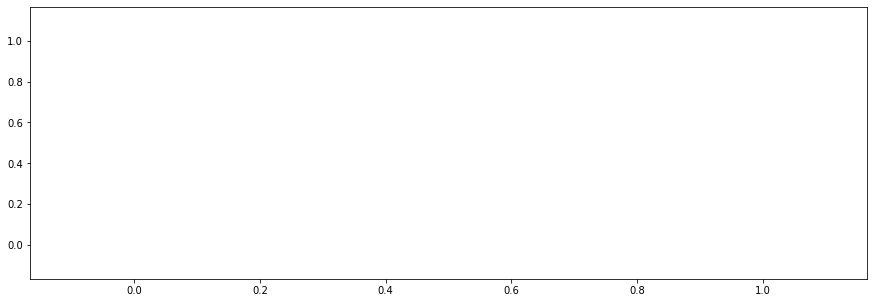

40
60
80


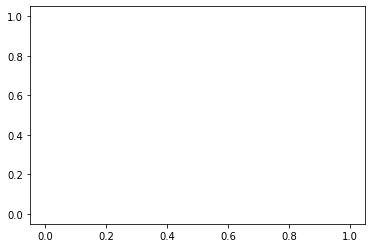

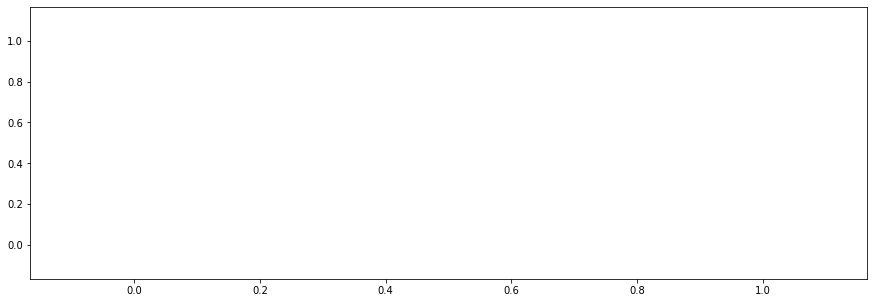

KeyboardInterrupt: 

In [16]:
for index, each in enumerate(targetlist):
    
    if True:
        #if index==0:
        if True:
            
            best_power_list=[]
            powerstd_list=[]
            median_power_list=[]
                
            print(index/len(targetlist))
            #print(index)
            #print(each)

            ID=each.split('/')[-1].split('-')[0][4:]
            campaign=each.split('/')[-1].split('-')[1].split('_')[0][1:]

            ourstar=star(ID,campaign)
            
            if not (type(ourstar.k2p2bjd) == bool):

                freq, power, signalfit, best_freq, best_power, powerstd = whitening(
                    ourstar.k2p2bjd, ourstar.k2p2flux)
                towhiten=ourstar.k2p2flux-signalfit

                counter=0
                while True:
                    counter+=1
                    if counter % 20 == 0: print(counter)

                    towhiten = towhiten - signalfit
                    freq, power, signalfit, best_freq, best_power, powerstd = whitening(
                        ourstar.k2p2bjd, towhiten)
                    #print(best_power)
                    #print(powerstd)

                    if np.median(power)+4*powerstd > best_power:
                        break

                    last_one_to_whiten_without_break_in_while_loop = towhiten

                    best_power_list.append(best_power)
                    powerstd_list.append(powerstd)
                    median_power_list.append(np.median(power))

                best_power_list=np.asarray(best_power_list)
                powerstd_list=np.asarray(powerstd_list)
                median_power_list=np.asarray(median_power_list)

                k2p2flux_noise_floor_dict[each]=np.std(last_one_to_whiten_without_break_in_while_loop)

                how_noisy_is_the_signal = evaluate_whats_left(ourstar.k2p2bjd,last_one_to_whiten_without_break_in_while_loop)
                k2p2flux_noise_floor_dict_2[each] = how_noisy_is_the_signal

                fout=open('evaluation_k2p2flux','a')
                fout.write(each+' '+str(counter-1)+' '+str(how_noisy_is_the_signal)+'\n')
                fout.close()
                
            else:
                
                fout=open('evaluation_k2p2flux','a')
                fout.write(each+' '+'False\n')
                fout.close()

In [17]:
np.isnan(ourstar.k2p2bjd).any()

False

In [18]:
np.isnan(ourstar.k2p2flux).any()

False

In [19]:
power

array([nan, nan, nan, ..., nan, nan, nan])

In [20]:
freq, power, signalfit, best_freq, best_power, powerstd = whitening(ourstar.k2p2bjd, ourstar.k2p2flux)

In [ ]:
freq

In [ ]:
power

In [ ]:
(np.asarray([type(each) for each in ourstar.k2p2flux]) == 'numpy.float64').any()

In [ ]:
plt.plot(ourstar.k2p2bjd,ourstar.k2p2flux)

In [21]:
freq, power, signalfit, best_freq, best_power, powerstd = whitening(ourstar.k2p2bjd, ourstar.k2p2flux)

In [22]:
power

array([nan, nan, nan, ..., nan, nan, nan])

In [48]:
(np.asarray([type(each) for each in time]) == 'numpy.float64').any()

False

False
False
20.972057156908853
power:
[nan nan nan ... nan nan nan]


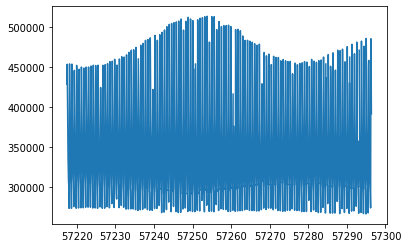

In [55]:
time = np.asarray(ourstar.k2p2bjd)
signaltowhiten = np.asarray(ourstar.k2p2flux)

print((np.asarray([type(each) for each in time]) == 'numpy.float64').any())
print((np.asarray([type(each) for each in signaltowhiten]) == 'numpy.float64').any())

plt.plot(time,signaltowhiten)

ls = LombScargle(time, signaltowhiten, nterms=1)

nyquist = len(time)/(2*(max(time)-min(time)))
print(nyquist)

freq, power = ls.autopower(normalization='psd',nyquist_factor=1.2, samples_per_peak=10)

print('power:')
print(power)

In [58]:
np.asarray([type(each) for each in time]) == 'numpy.float64'

array([False, False, False, ..., False, False, False])

In [36]:
freq

array([6.33979962e-04, 1.90193989e-03, 3.16989981e-03, ...,
       2.09688873e+01, 2.09701552e+01, 2.09714232e+01])

In [37]:
power

array([nan, nan, nan, ..., nan, nan, nan])